In [2]:
import pandas as pd
import seaborn as sn

In [13]:
df=pd.read_csv('height.csv')
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [14]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [15]:
df['Height'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Height
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


<AxesSubplot:xlabel='Height', ylabel='Count'>

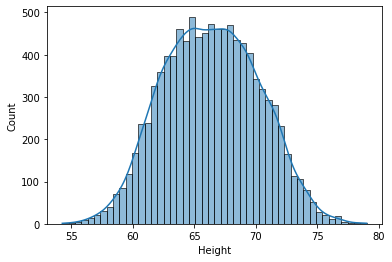

In [16]:
sn.histplot(df['Height'],kde=True)

<AxesSubplot:xlabel='Height', ylabel='Count'>

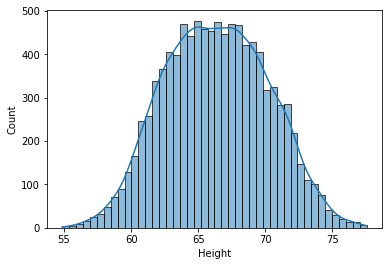

In [32]:
sn.histplot(df_removed_outlier.Height,kde=True)

In [18]:
df.Height.mean()

66.367559754866

In [20]:
df.Height.std()

3.847528120795573

In [23]:
upper=df.Height.mean()+df.Height.std()*3
upper

77.91014411725271

In [24]:
lower=df.Height.mean()-3*df.Height.std()
lower

54.824975392479274

##### Outlier Removal Using Normal Distribution which is +3*std and -3*std from mean
The data point less than 54.82 and greater than 77.91 are outliers remove that

In [26]:
df[(df.Height < lower) | (df.Height > upper)]


,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [29]:
df_removed_outlier=df[(df.Height > lower) & (df.Height < upper)]
df_removed_outlier

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<AxesSubplot:xlabel='Height', ylabel='Count'>

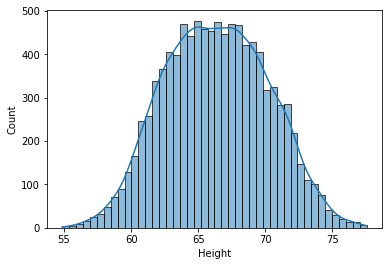

In [30]:
sn.histplot(df_removed_outlier.Height,kde=True)

In [33]:
df_removed_outlier.shape

(9993, 2)

(2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score



Let's add a new column in our dataframe for this Z score

In [34]:
#calculate Z score
df['zscore']=(df.Height-df.Height.mean())/df.Height.std()
df

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [35]:
df[df.zscore >3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [36]:
df[df.zscore < -3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [38]:
zremoved=df[(df.zscore <3) &(df.zscore > -3)]
zremoved

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [39]:
zremoved.shape

(9993, 3)